<a href="https://colab.research.google.com/github/nojiyoon/SeSAC_code/blob/main/1%EC%9B%9417%EC%9D%BC_Random_Forest_%EC%88%98%EC%97%85_%EB%82%B4%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris data

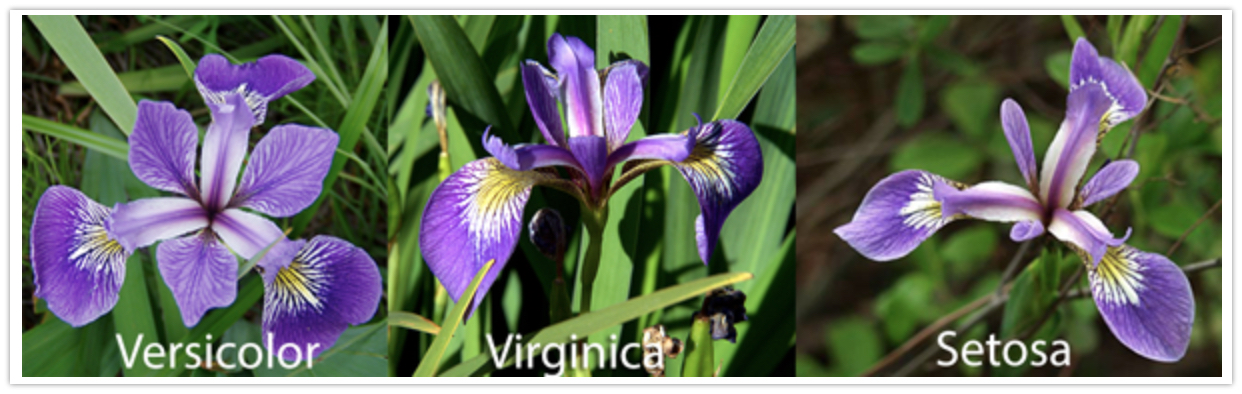

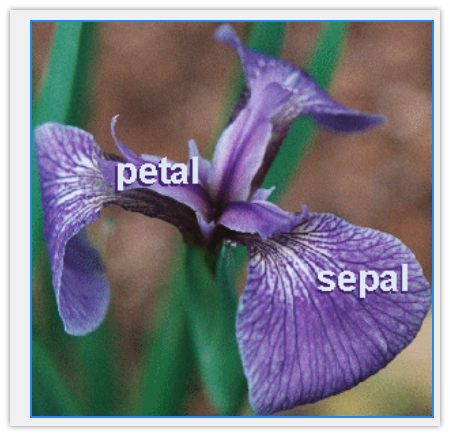

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
load_iris() # 붓꽃 데이터 리턴 - dict

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
ir_dic = load_iris()

In [ ]:
X = ir_dic['data'] # 독립변수 저장

In [ ]:
y = ir_dic.target # 종속변수 저장

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10) # 10개의 Decision Tree를 만들 객체 생성

In [ ]:
rfc

RandomForestClassifier(n_estimators=10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
X_test.shape

(30, 4)

In [ ]:
y_train.shape

(120,)

In [ ]:
y_test.shape

(30,)

In [ ]:
rfc.fit(X_train, y_train) # 트리 만들기

RandomForestClassifier(n_estimators=10)

In [ ]:
rfc.estimators_[8] # 9번째 Decision Tree

DecisionTreeClassifier(max_features='auto', random_state=221857179)

In [ ]:
from sklearn import tree

In [ ]:
dt_dot_data = tree.export_graphviz(rfc.estimators_[8],
                     feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],
                     class_names=['setosa', 'versicolor', 'virginica']) # 9번째 트리 시각화

In [ ]:
import pydotplus

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data) # dt_dot_data(트리내용)을 그림으로 바꿀 객체 생성

In [ ]:
dt_graph.create_png()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x02\x00\x00\x02\xe0\x08\x02\x00\x00\x00\xa8%W\xd2\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddi\\\x13\xe7\xda0\xf0{B\xc8\x02a\xdf\x97R\x08X\x10\xad\xd5\xba\x95M\xa0P\xb6\xda\x13T V\x0bu\xc1\xa3X\xb1\x8a\xb1V\xc5R\x0f\x8aZ\x90R\xb4j\x17\xc5\x05\xab\x11\x1f\xa0Z8\xed\xb1l\x85  \x16EZ\xa8\x0bJ\xa9\x14\x04\x82\x01\x84\x00!\xbc\x1f\xe69\xf3\xe6\t[\x80@ \\\xff\x0f\xe7G\xee\xb9f\xe6\x9aH\x8f\x97\xf7\xdc\x0b\xd6\xd7\xd7\x87\x00\x00\x00\x00\x00\xa6\x1f\x92\xa2\x13\x00\x00\x00\x00\x00P\x0c(\x83\x00\x00\x00\x000MA\x19\x04\x00\x00\x00\x80i\x8a\xac\xe8\x04\xc0\x14s\xf3\xe6\xcd\xda\xdaZEg\x01\xa6\x12GGGsssEg\x01\x00\x00\x03\xc0`\x884\x18\x91\xc0\xc0\xc0\xabW\xaf*:\x0b0\x95p\xb9\xdc\xa0\xa0 Eg\x01\x00\x00\x03\x80\xde 0b\x01\x01\x01)))\x8a\xce\x02L\r\x18\x86):\x05\x00\x00\x18\x14\x8c\r\x02\x00\x00\x00\xc04\x05e\x10\x00\x00\x00\x00\xa6)(\x83\x00\x00\x00\x000MA\x19\x04\x00\x00\x00\x80i\n\xca \x00\x00\x00\x00LS

In [ ]:
from IPython.display import Image

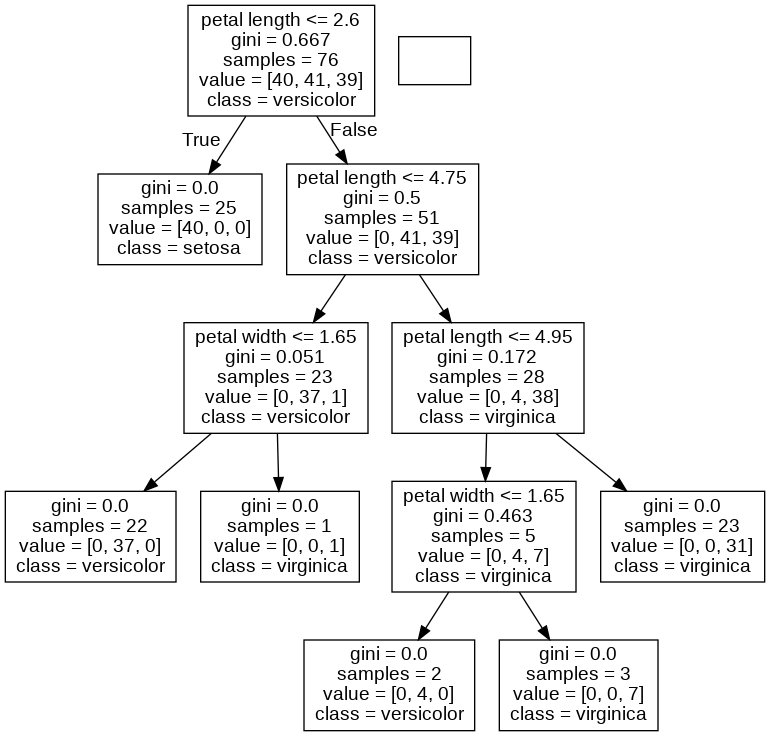

In [ ]:
Image(dt_graph.create_png())

In [ ]:
dt_graph.write_pdf('9번째 트리 고이고이 간직하리.pdf')

True

In [ ]:
# 지니 지수 계산해보기
1 - ((40/120)**2 + (41/120)**2 + (39/120)**2)

0.6665277777777778